In [1]:
import os
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly.offline.offline import _plot_html
import plotly.graph_objs as go
print (__version__) # requires version >= 1.9.0
init_notebook_mode(connected=True)

from mpl_toolkits import mplot3d
import matplotlib.pylab as plt
from matplotlib.pylab import rcParams
%matplotlib notebook
#%matplotlib inline
from utils import series_supp as ss
from utils import data_factory as df
from utils import k_mean as km

2.5.1


In [2]:
cwd = os.getcwd()
os.chdir(cwd)
print(cwd)
factory = df.DataFactory(cwd)
store_path = "cluster\\13_06\\"

RG24 = ss.SeriesSupp(cwd, factory, "RG24")
RG1 = ss.SeriesSupp(cwd, factory, "RG1")
GW = ss.SeriesSupp(cwd, factory, "GW")

C:\Users\utilisateur\workspace_stage


In [3]:
GW.import_dataset()
RG24.import_dataset()

Load csv_prepro\GW: Done
Load csv_prepro\RG\precipiation_RG: Done


In [4]:
cluster_GW = km.Kmean(GW)
cluster_RG = km.Kmean(RG24)

In [5]:
name_file = "kmean_GW_[2013, 2015, 2012, 2011, 2014]_allmonths_w_15"
cluster_GW.read_cluster(store_path, name_file)

# rewrite pickle if needed: manually (if lack of information in the TXT for the olds clusters)


cluster_GW.last_readed["years"] = [2015, 2014, 2013, 2012]
cluster_GW.last_readed["months"] = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
cluster_GW.last_readed["days"] = False

import pickle

outfile = open(cluster_GW.store_path + "kmean_2015_2014_2013_2012_allmonths7" + ".pkl", "wb")
pickle.dump(cluster_GW.last_readed, outfile)
outfile.close()

cluster_RG.ss.years = cluster_GW.ss.years
cluster_RG.ss.months = cluster_GW.ss.months
cluster_RG.ss.days = cluster_GW.ss.days

In [6]:
cluster_GW.ss.years = [2014]
cluster_GW.ss.months = [1]
cluster_GW.ss.split_data_years()
cluster_GW.ss.split_data_months()
cluster_GW.ss.split_data_weeks()

cluster_RG.ploter.change_mode(3)
cluster_RG.ploter.plot_scatter(cluster_RG.ss.tmp_dataset)

cluster_GW.ploter.change_mode(3)
cluster_GW.ploter.plot_scatter(cluster_GW.ss.tmp_dataset)

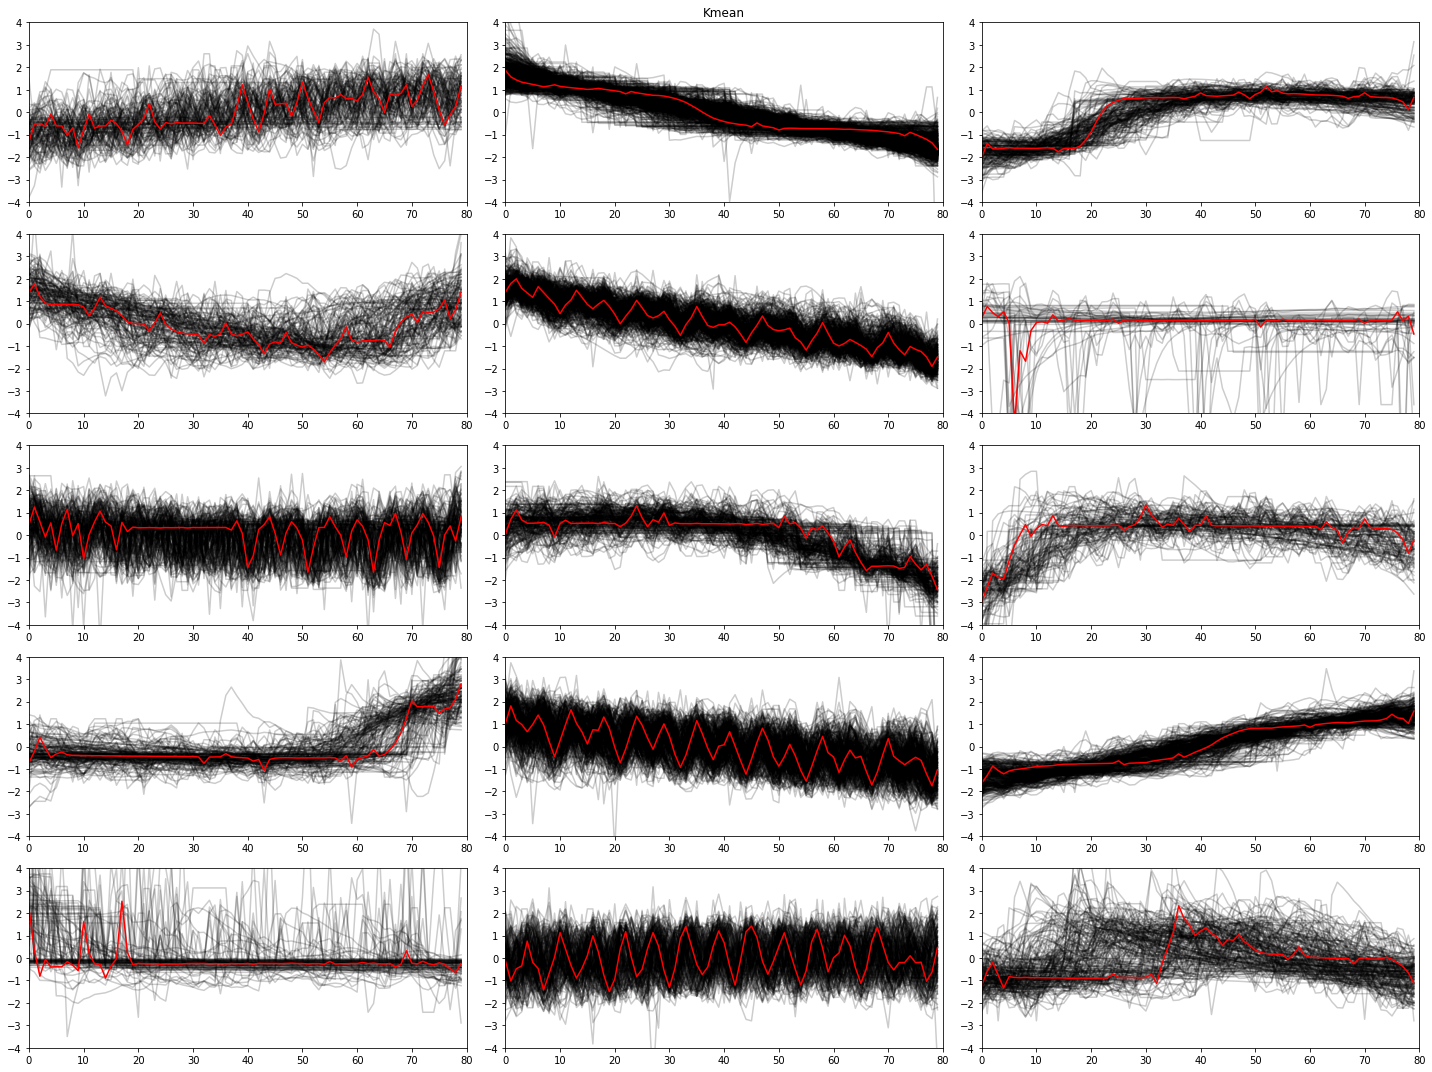

[2013, 2015, 2012, 2011, 2014]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
Weeks split: True
Normalized: True
min size of TS selected: 80
Sample size(0=None): 80
Algorithm used: Kmean
nb cluster: 15
Distance measure: softdtw



Counter({2: 162,
         1: 1026,
         4: 449,
         14: 185,
         7: 203,
         3: 125,
         13: 201,
         12: 85,
         11: 304,
         6: 179,
         9: 145,
         8: 97,
         0: 106,
         5: 42,
         10: 335})

In [7]:
cluster_GW.ploter.plot_cluster_light()
file = open(str(store_path) + str(name_file) + ".txt", "r") 
print (file.read())
file.close()
cluster_GW.cluster_counter()
cluster_GW.counter

#Plotly cluster
cluster_GW.ploter.change_mode(2)
cluster_GW.ploter.plot_cluster()

In [8]:
cluster_GW.capteur_parser()
cluster_GW.ploter.change_mode(3)
#cluster_GW.cluster_by_fullname

In [21]:
n_obs = 8
cluster_GW.geo.plotly_3D(cluster_GW.cluster_by_name[n_obs])
cluster_GW.ploter.plot_histo(n_obs)
cluster_GW.clust_hoverview(n_obs)

cluster_RG.ploter.change_mode(3)
#cluster_RG.ploter.plot_scatter(cluster_RG.ss.dataset)

cluster_RG.ss.reset_dataset()
cluster_RG.ss.years = [2013, 2014, 2015]

cluster_RG.ss.split_data_years()
cluster_RG.ss.split_data_months()
cluster_RG.ss.split_data_weeks()

In [19]:
cluster_RG.ploter.plot_scatter_by_capteur(cluster_RG.ss.dataset, ["24h_RG007", "24h_RG017"])

In [17]:
for k, v in cluster_RG.ss.dataset.items():
    print(k)

24h_RG002
24h_RG003
24h_RG005
24h_RG006
24h_RG007
24h_RG008
24h_RG009
24h_RG010
24h_RG011
24h_RG012
24h_RG013
24h_RG014
24h_RG015
24h_RG016
24h_RG017
24h_RG018
24h_RG019
24h_RG020
24h_RG021
24h_RG022
24h_RG023
24h_RG024
24h_RG025
24h_RG026
